In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('earthquakes_nepal.csv')

In [3]:
df.sample(5)

,date,time,latitude,longitude,magnitude,epicenter,ad_date,utc_time,datetime
176,B.S.: 2078-03-15A.D.: 2021-06-29,Local: 14:20UTC: 08:35,27.30,87.26,4.0,Sankhuwasabha,6/29/2021,8:35,6/29/2021 8:35
122,B.S.: 2079-09-08A.D.: 2022-12-23,Local: 07:15UTC: 01:30,29.10,83.30,4.6,Dolpa,12/23/2022,1:30,12/23/2022 1:30
410,B.S.: 2072-06-18A.D.: 2015-10-05,Local: 13:18UTC: 07:33,27.71,86.15,4.8,Dolakha,10/5/2015,7:33,10/5/2015 7:33
341,B.S.: 2073-02-11A.D.: 2016-05-24,Local: 00:54UTC: 19:09,27.73,85.16,4.2,Dhading,5/24/2016,19:09,5/24/2016 19:09
478,B.S.: 2072-03-14A.D.: 2015-06-29,Local: 23:34UTC: 17:49,27.93,85.64,4.0,Sindhupalchowk,6/29/2015,17:49,6/29/2015 17:49


In [4]:
df.describe()

,latitude,longitude,magnitude
count,1249.000000,1249.000000,1249.000000
mean,28.241962,84.657494,4.444275
std,0.838293,2.142590,0.499889
min,23.710000,69.850000,4.000000
25%,27.730000,82.530000,4.100000
50%,27.940000,85.350000,4.300000
75%,28.650000,86.100000,4.600000
max,30.500000,89.880000,7.600000


In [5]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicates_with_index = duplicate_rows.reset_index()
print(duplicates_with_index)

Empty DataFrame
Columns: [index, date, time, latitude, longitude, magnitude, epicenter, ad_date, utc_time, datetime]
Index: []


In [6]:
df.drop(['date','time','utc_time'],axis=1,inplace=True)

In [7]:
df.duplicated().sum()

1

In [8]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicates_with_index = duplicate_rows.reset_index()
print(duplicates_with_index)

   index  latitude  longitude  magnitude epicenter    ad_date        datetime
0    631     27.76      86.31        5.3   Dolakha  5/12/2015  5/12/2015 2:44
1    637     27.76      86.31        5.3   Dolakha  5/12/2015  5/12/2015 2:44


In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
# Create a profile report
profile = ProfileReport(df, title="Earthquake Data Profile", explorative=True)

# Save the report as HTML
profile.to_file("earthquake_profile.html")

print("✅ Profile report saved as earthquake_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00,  9.10it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Profile report saved as earthquake_profile.html


In [12]:
profile.to_notebook_iframe()

In [13]:
df.sample(3)

,latitude,longitude,magnitude,epicenter,ad_date,datetime
600,27.75,86.14,4.0,Dolakha,5/14/2015,5/14/2015 7:43
1174,27.96,85.32,4.1,Nuwakot,2/6/1997,2/6/1997 14:10
1142,27.84,87.00,4.6,Sankhuwasabha,9/6/1998,9/6/1998 21:35


In [14]:
from collections import Counter

data = []
for place in df['epicenter'].dropna().tolist():   # drop missing values
    for word in place.split():
        data.append(word)

place_counter = Counter(data).most_common(30)
place_df = pd.DataFrame(place_counter, columns=['Word', 'Frequency'])

In [15]:
print(place_df)

              Word  Frequency
0          Dolakha        203
1   Sindhupalchowk        116
2          Bajhang         74
3    Sindhupalchok         58
4           Bajura         58
5          Dhading         56
6        Taplejung         52
7           Gorkha         50
8           Rasuwa         48
9          Nuwakot         42
10           Humla         33
11         Lamjung         28
12        Darchula         26
13        Jajarkot         22
14           Kaski         19
15         Baglung         19
16         Dailekh         19
17           Tibet         18
18            Mugu         17
19           Rukum         16
20       Ramechhap         15
21   Sankhuwasabha         13
22  Kavrepalanchok         12
23         Khotang         12
24      Solukhumbu         12
25       Panchthar         11
26       Kathmandu         11
27          Myagdi          9
28        Udayapur          9
29           Rolpa          9


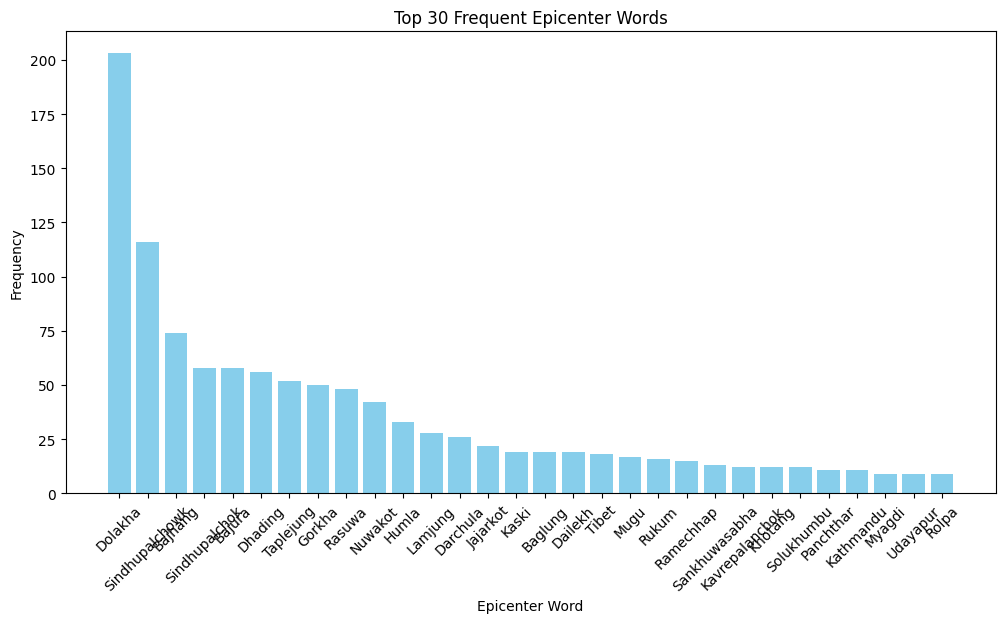

In [16]:
%matplotlib inline

plt.figure(figsize=(12,6))
plt.bar(place_df['Word'], place_df['Frequency'], color="skyblue")
plt.title("Top 30 Frequent Epicenter Words")
plt.xlabel("Epicenter Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


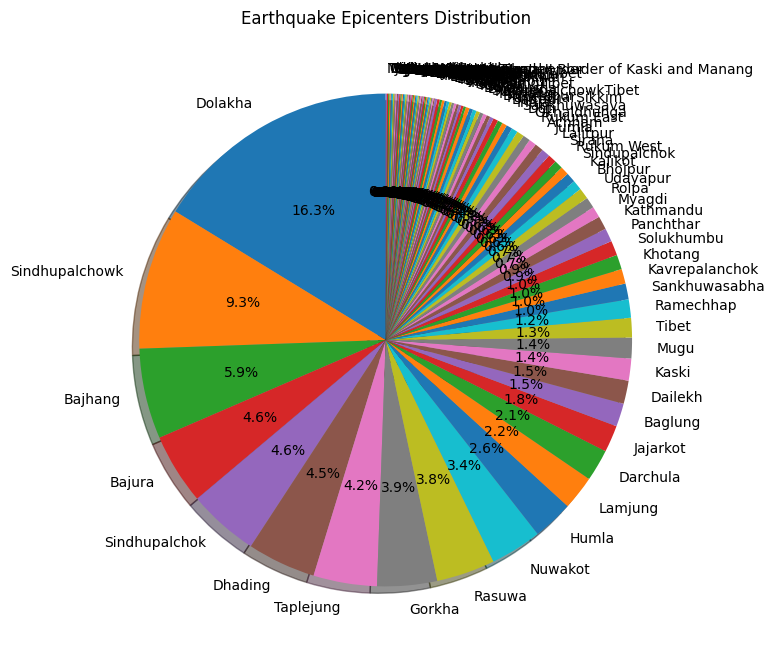

In [17]:
# Count how many times each epicenter appears
epicenter_counts = df['epicenter'].value_counts()

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    epicenter_counts.values,               # sizes
    labels=epicenter_counts.index,         # labels
    autopct='%1.1f%%',
    # show percentage
    startangle=90,                         # rotate start
    shadow=True
)

plt.title("Earthquake Epicenters Distribution")
plt.show()

In [ ]:
import folium
from folium.plugins import MarkerCluster

# --- Assumptions ---
# df has columns: latitude, longitude, magnitude, epicenter, datetime

# Ensure datetime is proper
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

# Ensure latitude and longitude are numeric
df["latitude"]  = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")

# Drop rows with missing coordinates
df_map = df.dropna(subset=["latitude", "longitude"]).copy()

# Optional: filter by date or magnitude
# df_map = df_map[df_map["datetime"].dt.date == pd.to_datetime("2025-04-04").date()]
# df_map = df_map[df_map["magnitude"] >= 4.0]

# Function to choose marker color by magnitude
def mag_color(mag):
    if pd.isna(mag):
        return "gray"
    elif mag < 4.0:
        return "green"
    elif mag < 5.0:
        return "orange"
    else:
        return "red"

# Create base map centered on Nepal
m = folium.Map(location=[28.2, 84.0], zoom_start=7, tiles="OpenStreetMap")

# Add marker cluster
cluster = MarkerCluster(name="Earthquakes").add_to(m)

# Add circle markers
for _, row in df_map.iterrows():
    popup_text = f"""
    <b>Epicenter:</b> {row.get('epicenter','N/A')}<br>
    <b>Magnitude:</b> {row.get('magnitude','N/A')}<br>
    <b>Datetime:</b> {row.get('datetime','')}
    """
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=4 if pd.isna(row["magnitude"]) else max(4, min(12, 2*row["magnitude"])),
        color=mag_color(row["magnitude"]),
        fill=True,
        fill_color=mag_color(row["magnitude"]),
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(cluster)

# Add layer control
folium.LayerControl().add_to(m)

# Save map
m.save("nepal_earthquakes_map.html")
print("✅ Map saved as nepal_earthquakes_map.html — open in your browser.")


✅ Map saved as nepal_earthquakes_map.html — open in your browser.


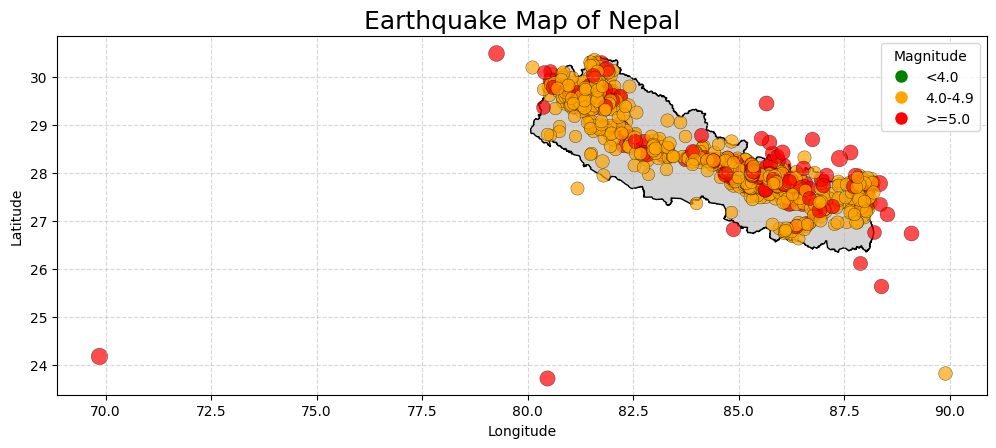

In [ ]:
import geopandas as gpd
from matplotlib.lines import Line2D

# --- Prepare earthquake data ---
df["latitude"]  = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
df_map = df.dropna(subset=["latitude", "longitude"]).copy()

# Load Nepal shapefile (Level 0)
nepal = gpd.read_file("gadm41_NPL_shp/gadm41_NPL_0.shp")

# Convert earthquake points to GeoDataFrame
gdf = gpd.GeoDataFrame(df_map, geometry=gpd.points_from_xy(df_map.longitude, df_map.latitude))

# Color function by magnitude
def mag_color(mag):
    if mag < 4.0: return "green"
    elif mag < 5.0: return "orange"
    else: return "red"

# Scale marker size
gdf['size'] = gdf['magnitude'].apply(lambda x: max(20, x*20))  # minimum size 20

# --- Plot ---
fig, ax = plt.subplots(figsize=(12,12))
nepal.plot(ax=ax, color="lightgray", edgecolor="black")

# Plot points
for _, row in gdf.iterrows():
    # Only label magnitude >=4.5 to reduce clutter
    # label = row['epicenter'] if row['magnitude'] >= 4.5 else ""
    ax.scatter(row['longitude'], row['latitude'],
               color=mag_color(row['magnitude']),
               s=row['size'],
               alpha=0.7,
               edgecolor='k',
               linewidth=0.3,
            #    label=label
                )
    # if label:
    #     ax.text(row['longitude'], row['latitude'], label, fontsize=8, ha='right', va='bottom')

# Legend for colors
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='<4.0', markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='4.0-4.9', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='>=5.0', markerfacecolor='red', markersize=10)
]
ax.legend(handles=legend_elements, title="Magnitude", loc='upper right')

ax.set_title("Earthquake Map of Nepal", fontsize=18)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


This show that high number of earthquack are range form 4.9 - 4.9

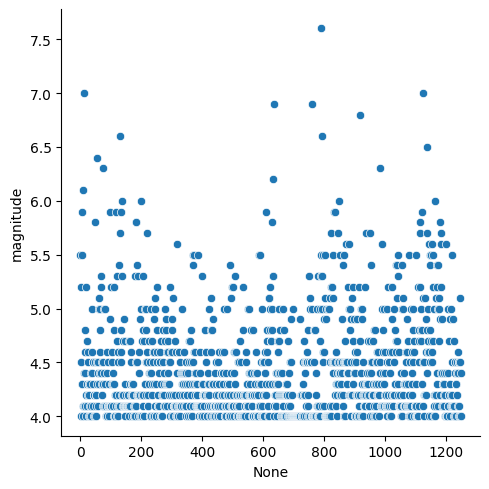

In [21]:
sns.relplot(x=df.index,y=df['magnitude'])

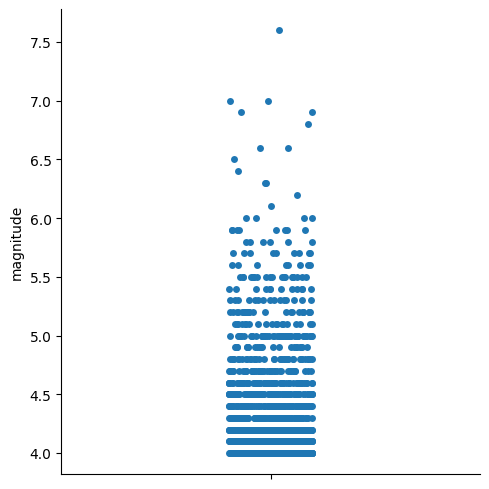

In [22]:
sns.catplot(df['magnitude'])

In [23]:
red = []
org = []
green = []

for i in df['magnitude'].values:
    if i < 5:
        green.append(i)
    elif i >= 5 and i < 6:
        org.append(i)
    else:
        red.append(i)

In [24]:
len(red)

18

In [25]:
len(org)

171

In [26]:
len(green)

1059

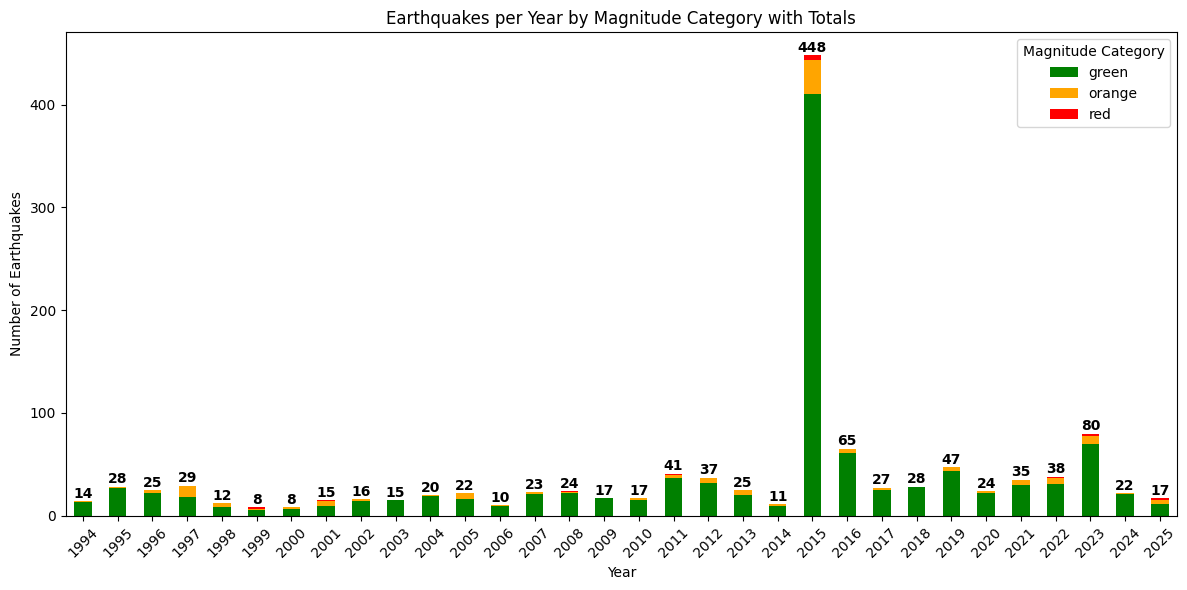

In [44]:
# Ensure datetime and extract year
df['ad_date'] = pd.to_datetime(df['ad_date'], errors='coerce')
df['year'] = df['ad_date'].dt.year

# Categorize magnitudes
df['category'] = pd.cut(df['magnitude'],
                        bins=[-float('inf'), 5, 6, float('inf')],
                        labels=['green', 'orange', 'red'])

# Count per year per category
count_df = df.groupby(['year', 'category']).size().unstack(fill_value=0)

# Add total per year
count_df['total'] = count_df.sum(axis=1)

# Plot stacked bar chart (exclude Total row)
plot_df = count_df.copy()
plot_df[['green','orange','red']].plot(kind='bar', stacked=True, figsize=(12,6),
                                       color=['green','orange','red'])

# Add total labels on top of bars
for i, total in enumerate(plot_df['total']):
    plt.text(i, total + 0.5, str(total), ha='center', va='bottom', fontweight='bold')

plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquakes per Year by Magnitude Category with Totals")
plt.legend(title="Magnitude Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
